#### Import Library

In [1]:
import pandas as pd
from sqlalchemy import create_engine
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from credentials import user
from credentials import server
from credentials import password

from credentials import user, password, server

#### Formatting

In [2]:
%matplotlib inline

#### Using the pandas read_csv() function, read the dataset into your notebook as DataFrames. 


In [3]:
hubnash = pd.read_csv('../data/hubNashville__311__Service_Requests.csv', low_memory=False)
hubnash.head(5)

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
0,353977,Closed,COVID-19,COVID-19 - Submit Input about The Plan to Reop...,COVID-19 - Submit Input about The Plan to Reop...,04/28/2020 02:33:22 PM,04/28/2020 02:33:22 PM,hubNashville Community,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,367021,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,05/13/2020 09:00:52 PM,05/13/2020 09:00:52 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,419194,Closed,"Streets, Roads & Sidewalks",Remove debris in roadway,Roadway,07/17/2020 03:21:03 PM,07/28/2020 04:06:19 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,Lafayette St & Claiborne St,NASHVILLE,17.0,37210,36.148412,-86.761179,"(36.1484116, -86.761179)"
3,366600,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,05/13/2020 04:04:14 PM,05/13/2020 04:04:14 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,408945,Closed,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,Resolved by hubNashville on First Call,07/06/2020 05:57:28 PM,07/06/2020 05:57:28 PM,Phone,NaN,NaN,...,False,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Be sure that Postgres/PGAdmin is launched

# establish a database connection


# Replace `<lahman_baseball_database_name>` with the actual name of your lahman baseball database as it appears in pgadmin
#covid_data is the database name
#put on separate line \ does not work
engine = create_engine("postgres+psycopg2://"+user+":"+password+"@"+server+":5432/covid_data")

#### Explore the COVID-19 violations reported through hubNashville to see how these have changed over time. 
#### Do violations get reported more in certain areas?

In [5]:
# Examine shapes of dataframes. Numbers of columns and rows
hubnash.shape

(486496, 21)

In [6]:
# Examine data types for the columns in each table
hubnash.dtypes

Request #                       int64
Status                         object
Request Type                   object
Subrequest Type                object
Additional Subrequest Type     object
Date / Time Opened             object
Date / Time Closed             object
Request Origin                 object
System of Origin ID            object
Contact Type                   object
Preferred Language            float64
State Issue                      bool
Parent Request                float64
Closed When Created              bool
Address                        object
City                           object
Council District              float64
ZIP                            object
Latitude                      float64
Longitude                     float64
Mapped Location                object
dtype: object

In [7]:
# tail of hubnash df
hubnash.tail()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
486491,163,Closed,"Trash, Recycling & Litter",Missed Pickup - Trash Cart Service,Trash - Curbside/Alley Missed Pickup,07/17/2017 07:12:00 AM,07/21/2017 11:58:00 AM,Phone,NaN,NaN,...,False,NaN,True,3117 PENN MEADE WAY,NASHVILLE,15.0,37214,36.242300,-86.704280,"(36.2423, -86.70428)"
486492,3202,Closed,"Streets, Roads & Sidewalks",Overgrowth on right of way,Roadway,07/28/2017 10:07:00 AM,08/15/2017 04:02:00 AM,Phone,NaN,NaN,...,False,NaN,True,Cunniff Pkwy & Fonnic Dr,GOODLETTSVILLE,3.0,37072,36.283740,-86.742120,"(36.28374, -86.74212)"
486493,1237,Closed,"Streets, Roads & Sidewalks",Overgrowth on right of way,Roadway,07/20/2017 07:44:00 AM,07/28/2017 04:22:00 PM,Phone,NaN,NaN,...,False,NaN,True,SHARPE AVE & GRANADA AVE,NASHVILLE,5.0,37206,36.189010,-86.753640,"(36.18901, -86.75364)"
486494,1921,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,07/22/2017 01:00:18 PM,07/23/2017 09:07:52 PM,Phone,OE-00020883,NaN,...,False,NaN,False,MURFREESBORO PKE / DELL PKWY,NASHVILLE,13.0,37217,36.107803,-86.676879,"(36.10780312, -86.67687864)"
486495,3287,Closed,"Streets, Roads & Sidewalks",Driveway Transition/Drop Off,Driveway Transition/Drop Off,07/28/2017 06:11:29 PM,08/15/2017 09:02:35 AM,Phone,NaN,NaN,...,False,NaN,False,338 LADYBIRD DR,NASHVILLE,28.0,37217,36.097680,-86.664210,"(36.09768, -86.66421)"


#### Data Cleaning for hubnash df

In [8]:
# check if any value is NaN in a Pandas DataFrame

hubnash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486496 entries, 0 to 486495
Data columns (total 21 columns):
Request #                     486496 non-null int64
Status                        486496 non-null object
Request Type                  486164 non-null object
Subrequest Type               483005 non-null object
Additional Subrequest Type    482625 non-null object
Date / Time Opened            486496 non-null object
Date / Time Closed            475795 non-null object
Request Origin                486496 non-null object
System of Origin ID           29269 non-null object
Contact Type                  27479 non-null object
Preferred Language            0 non-null float64
State Issue                   486496 non-null bool
Parent Request                5183 non-null float64
Closed When Created           486496 non-null bool
Address                       376254 non-null object
City                          370585 non-null object
Council District              370423 non-null float64

In [9]:
# subset Subrequest Type COVID-19 Violations
#df[df['Position'].str.contains("PG")] does not work so do a absoluate == to subset
hubnash_covid = hubnash[hubnash['Subrequest Type'] == 'COVID-19 Violations'] 


In [10]:
hubnash_covid

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,System of Origin ID,Contact Type,...,State Issue,Parent Request,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
61,346122,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/15/2020 11:33:26 AM,04/16/2020 02:55:01 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,928 6th Ave S,NASHVILLE,17.0,37203,36.149040,-86.772273,"(36.1490396, -86.77227289999999)"
95,339374,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/04/2020 06:13:59 PM,04/09/2020 01:07:22 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,500 Gallatin Ave,NASHVILLE,5.0,37206,36.181548,-86.749695,"(36.181548, -86.749695)"
110,343513,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/10/2020 10:40:08 AM,04/14/2020 07:39:09 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,5720 Crossings Blvd,NaN,NaN,NaN,36.039608,-86.646541,"(36.039608, -86.646541)"
113,442996,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,08/12/2020 02:05:29 AM,08/12/2020 04:03:35 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,7689 Hwy 70 S,NASHVILLE,22.0,37221,36.078933,-86.953400,"(36.07893290000001, -86.9533998)"
118,339423,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,04/04/2020 08:12:27 PM,04/09/2020 02:21:09 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,5310 Mt View Rd,ANTIOCH,32.0,37013,36.048182,-86.648447,"(36.0481819, -86.6484474)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324870,501190,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,11/12/2020 06:12:35 PM,11/13/2020 03:30:57 PM,Phone,NaN,NaN,...,False,NaN,False,3201 Old Hickory Blvd,OLD HICKORY,11.0,37138,36.244860,-86.637270,"(36.24486, -86.63727)"
324943,502791,New,COVID-19,COVID-19 Violations,COVID-19 Violations,11/13/2020 10:09:18 PM,NaN,hubNashville Community,NaN,NaN,...,False,NaN,False,306 11th Ave S,NASHVILLE,19.0,37203,36.153774,-86.783990,"(36.1537745, -86.7839901)"
325263,502933,New,COVID-19,COVID-19 Violations,COVID-19 Violations,11/14/2020 01:23:18 AM,NaN,hubNashville Community,NaN,NaN,...,False,NaN,False,121 17th Ave S,NASHVILLE,19.0,37203,36.151999,-86.793587,"(36.151999000539355, -86.7935866592785)"
325383,501297,Closed,COVID-19,COVID-19 Violations,COVID-19 Violations,11/12/2020 07:15:46 PM,11/13/2020 03:37:21 PM,hubNashville Community,NaN,NaN,...,False,NaN,False,515 Bell Rd,ANTIOCH,32.0,37013,36.071121,-86.637056,"(36.0711212, -86.6370555)"


In [11]:
#Further clean up by dropping unecessary columns
hubnash_covid = hubnash_covid.drop(columns = ['Request #','Request Type','Additional Subrequest Type','System of Origin ID','Contact Type','Preferred Language','State Issue','Parent Request' ])

In [12]:
#look at columns now
hubnash_covid.columns

Index(['Status', 'Subrequest Type', 'Date / Time Opened', 'Date / Time Closed',
       'Request Origin', 'Closed When Created', 'Address', 'City',
       'Council District', 'ZIP', 'Latitude', 'Longitude', 'Mapped Location'],
      dtype='object')

In [13]:
# change column name to get rid of spaces
hubnash_covid=hubnash_covid.rename(columns = {'Date / Time Opened':'Date_Opened'})

In [14]:
hubnash_covid

,Status,Subrequest Type,Date_Opened,Date / Time Closed,Request Origin,Closed When Created,Address,City,Council District,ZIP,Latitude,Longitude,Mapped Location
61,Closed,COVID-19 Violations,04/15/2020 11:33:26 AM,04/16/2020 02:55:01 PM,hubNashville Community,False,928 6th Ave S,NASHVILLE,17.0,37203,36.149040,-86.772273,"(36.1490396, -86.77227289999999)"
95,Closed,COVID-19 Violations,04/04/2020 06:13:59 PM,04/09/2020 01:07:22 PM,hubNashville Community,False,500 Gallatin Ave,NASHVILLE,5.0,37206,36.181548,-86.749695,"(36.181548, -86.749695)"
110,Closed,COVID-19 Violations,04/10/2020 10:40:08 AM,04/14/2020 07:39:09 PM,hubNashville Community,False,5720 Crossings Blvd,NaN,NaN,NaN,36.039608,-86.646541,"(36.039608, -86.646541)"
113,Closed,COVID-19 Violations,08/12/2020 02:05:29 AM,08/12/2020 04:03:35 PM,hubNashville Community,False,7689 Hwy 70 S,NASHVILLE,22.0,37221,36.078933,-86.953400,"(36.07893290000001, -86.9533998)"
118,Closed,COVID-19 Violations,04/04/2020 08:12:27 PM,04/09/2020 02:21:09 PM,hubNashville Community,False,5310 Mt View Rd,ANTIOCH,32.0,37013,36.048182,-86.648447,"(36.0481819, -86.6484474)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
324870,Closed,COVID-19 Violations,11/12/2020 06:12:35 PM,11/13/2020 03:30:57 PM,Phone,False,3201 Old Hickory Blvd,OLD HICKORY,11.0,37138,36.244860,-86.637270,"(36.24486, -86.63727)"
324943,New,COVID-19 Violations,11/13/2020 10:09:18 PM,NaN,hubNashville Community,False,306 11th Ave S,NASHVILLE,19.0,37203,36.153774,-86.783990,"(36.1537745, -86.7839901)"
325263,New,COVID-19 Violations,11/14/2020 01:23:18 AM,NaN,hubNashville Community,False,121 17th Ave S,NASHVILLE,19.0,37203,36.151999,-86.793587,"(36.151999000539355, -86.7935866592785)"
325383,Closed,COVID-19 Violations,11/12/2020 07:15:46 PM,11/13/2020 03:37:21 PM,hubNashville Community,False,515 Bell Rd,ANTIOCH,32.0,37013,36.071121,-86.637056,"(36.0711212, -86.6370555)"


In [15]:
#Get the month change to datetimeto datetime format
hubnash_covid['month'] = pd.DatetimeIndex(hubnash_covid['Date_Opened']).month

#Group count of row (meaning request number) counted by month

#example:  Get the number of dates / entries in each month
#data.groupby('month')['date'].count()

hubnash_coivd_group_month = hubnash_covid.groupby('month')['Date_Opened'].count().reset_index()

#Sort the month by time order
#hubnash_coivd_group_month = hubnash_coivd_group_month.sort_values

In [16]:
hubnash_coivd_group_month

,month,Date_Opened
0,3,10
1,4,2421
2,5,1469
3,6,1666
4,7,2738
5,8,1661
6,9,687
7,10,879
8,11,357


In [17]:
# hubnash_coivd_group_month columns

hubnash_coivd_group_month.columns

Index(['month', 'Date_Opened'], dtype='object')

[Text(0, 0, ''),
 Text(0, 0, 'March'),
 Text(0, 0, 'April'),
 Text(0, 0, 'May'),
 Text(0, 0, 'June'),
 Text(0, 0, 'July'),
 Text(0, 0, 'August'),
 Text(0, 0, 'September'),
 Text(0, 0, 'October'),
 Text(0, 0, 'November')]

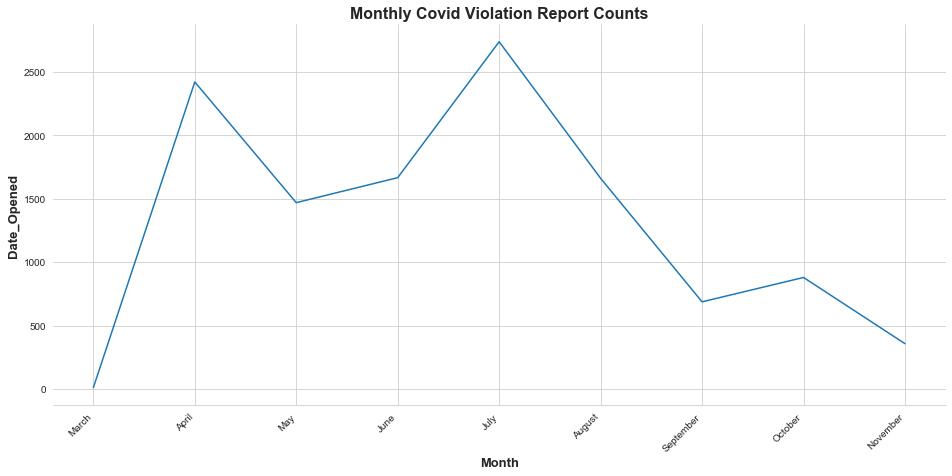

In [19]:
#Create subplot
#note for plotting exploration analysis https://towardsdatascience.com/data-visualization-cheat-sheet-with-seaborn-and-matplotlib-70cac11c6517
sns.set_style('whitegrid')
fig,ax=plt.subplots(figsize=(16,7))
#Create lineplot
chart=sns.lineplot(x=hubnash_coivd_group_month['month'], y=hubnash_coivd_group_month['Date_Opened'],ax=ax)
sns.despine(left=True)

#Customize chart
chart.set_xlabel('Month',weight='bold',fontsize=13)
chart.set_ylabel('Date_Opened', weight='bold',fontsize=13)
chart.set_title('Monthly Covid Violation Report Counts',weight='bold',fontsize=16)
chart.set_xticklabels(['','March','April','May','June','July','August','September','October','November'], rotation = 45, ha="right")

In [20]:
#Group count of row (meaning request number) by city column

#example:  Get the number of dates / entries in each month
#data.groupby('month')['date'].count()

hubnash_coivd_group_city = hubnash_covid.groupby('City')['Date_Opened'].count().reset_index()

In [21]:
hubnash_coivd_group_city

,City,Date_Opened
0,ANTIOCH,477
1,BRENTWOOD,50
2,GOODLETTSVILLE,209
3,HERMITAGE,438
4,JOELTON,44
5,LA VERGNE,1
6,LAVERGNE,9
7,MADISON,595
8,NASHVILLE,8835
9,NOLENSVILLE,5


In [22]:
# get columns for hubnash_coivd_group_city

hubnash_coivd_group_city.columns

Index(['City', 'Date_Opened'], dtype='object')

In [23]:
# Get rid of duplicate nashville

#Get 12 first categories
hubnash_coivd_group_city = hubnash_coivd_group_city.sort_values(by=['Date_Opened'], ascending = False).head(12)
hubnash_coivd_group_city

,City,Date_Opened
8,NASHVILLE,8835
7,MADISON,595
0,ANTIOCH,477
3,HERMITAGE,438
2,GOODLETTSVILLE,209
11,OLD HICKORY,206
1,BRENTWOOD,50
4,JOELTON,44
12,WHITES CREEK,27
6,LAVERGNE,9


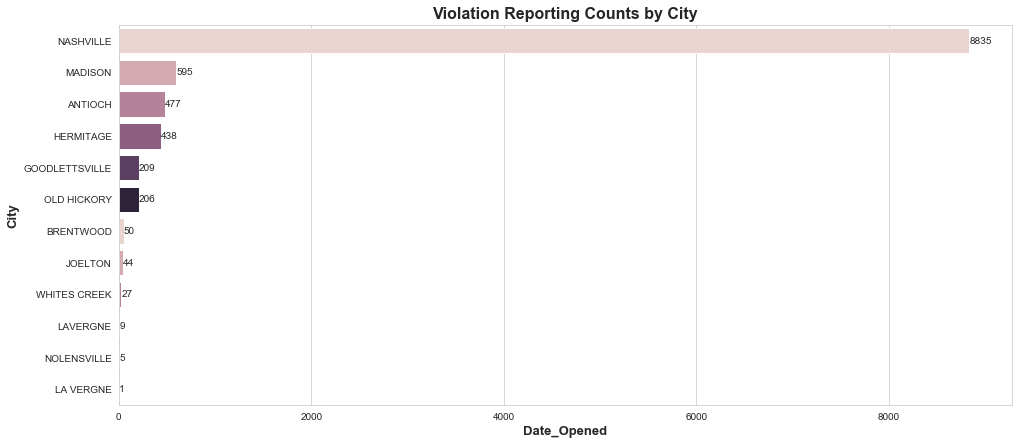

In [24]:
#Horizontal barchart
#Create subplot
sns.set_style('whitegrid') #set theme
fig,ax=plt.subplots(figsize=(16,7))
#Create barplot
chart2 = sns.barplot(x=hubnash_coivd_group_city['Date_Opened'],y=hubnash_coivd_group_city['City'],order=hubnash_coivd_group_city.sort_values('Date_Opened',ascending = False).City,palette=sns.cubehelix_palette())

#Customize chart
chart2.set_xlabel('Date_Opened',weight='bold',fontsize=13)
chart2.set_ylabel('City', weight='bold',fontsize=13)
chart2.set_title('Violation Reporting Counts by City',weight='bold',fontsize=16)
#Value number on chart: https://stackoverflow.com/questions/49820549/labeling-horizontal-barplot-with-values-in-seaborn
for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment


In [25]:
#Exploration
# mask_use table in the covid_data database on AWS

mask_use = pd.read_sql("SELECT * FROM mask_use;", con=engine)
mask_use.head()

,county_fips,never,rarely,sometimes,frequently,always
0,01001,0.053,0.074,0.134,0.295,0.444
1,01003,0.083,0.059,0.098,0.323,0.436
2,01005,0.067,0.121,0.120,0.201,0.491
3,01007,0.020,0.034,0.096,0.278,0.572
4,01009,0.053,0.114,0.180,0.194,0.459


In [28]:
# County FIPS: 47037 - Davidson County, TN.

#subset only davidson county mask use data

davidson_mask_use = mask_use[mask_use['county_fips'] == '47037']

In [29]:
#look at the head of davidson_mask_use

davidson_mask_use.head()

,county_fips,never,rarely,sometimes,frequently,always
2446,47037,0.02,0.037,0.086,0.181,0.677


In [30]:
# save hubnash_covid df into a new csv file

hubnash_covid.to_csv('hubnash_covid1.csv') 